# Chapter 3: Linearity
Linearity is a foundational concept in machine learning, characterizing models where the output is a direct, weighted sum of the input features. While simple and highly interpretable, linear models like Linear and Logistic Regression make strong assumptions about the underlying data structure. Their performance is often limited when faced with complex, non-linear relationships. However, the principle of linearity remains profoundly influential, serving as the essential building block within sophisticated non-linear architectures such as neural networks and kernel methods. This chapter covers fundamental concepts through building end-to-end projects based on the machine learning life cycle.

## Table of Contents
- [Linear Regression](#linear-regression)
- [Gradient Descent](#gradient-descent)
- [Stochastic Gradient Descent](#stochastic-gradient-descent)
- [Linear Classification (Logistic Regression)](#linear-classification-logistic-regression)
- [References](#references)

## Linear Regression
Linear regression is the primary supervised learning algorithm that fits a linear function to the data. It is a statistical method that can be used to solve multi-dimensional problems. The number of features (independent variables) determines the **feature space dimensionality (input space)**.

### Simple Linear Regression
In a **1D feature space**, the simple linear regression is mathematically expressed as the best straight line.
$$ \hat{y} = w_1x + w_0 $$

Where:
- $ \hat{y} $ is the **fitted** line (predicted output of the model)
- $ w_1 $ is the **slope**.
- $ w_0 $ is the **intercept**.

### Multiple Linear Regression
The equation stated can be generalized in **n-dimensional** feature space as shown in the following. The model is a **hyperplane** in this scenario.
$$ \hat{y} = w_nx_n + ... + w_1x_1 + w_0 $$

Where $w = (w_0, w_1, ..., w_n)$ is the **weight (coefficient) vector**.

<img src="../figures/figure_3_1_linear_regression.png" alt="Linear Regression">
<p style="text-align:center; cursor:pointer;"><a src="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">Source: Scikit-learn User Guide</a></p>

### Ordinary Least Squares
There are many different methods to solve the stated problem. **Ordinary Least Squares (OLS**) is the most common method used for fitting a linear regression model. Its goal is to find the line (or hyperplane) that **minimizes** the **total squared error** between the **predicted** values and the **actual** descrete data.

A **loss function** (also called cost/error/objective function in the context of optimization) is a mathematical function that measures how well a machine learning model's predictions match the actual true values. There are different loss functions for different purposes that are explained in the next sections. **L2 Loss** (euclidean norm) is a fundamental loss function that measures the squared difference between predicted and true values. For a single data point it is expressed as follows.
$$ \text{Loss} = (t_\text{true} - y_\text{predicted}) ^ 2 $$

For a dataset that contains a number of data points, **Mean Squared Error (MSE)** is typically used.
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} $$

### Problem Statement and Formulation
In order to minimize the MSE function, the following optimization problem should be solved for the **decision variable vector** $w$.
$$ w^* = \underset{w \in R^n}{\arg\min} \, L(w) $$

Where:
- $ L $ is the **MSE function** that is supposed to be minimized.
- $ w^* $ is the **minimizing vector**.

While setting the derivative to zero finds **stationary points** in single-variable calculus, the **multivariate generalization** is shown in the following **gradient-based** equation.
$$ ∇L = [\frac{\partial L}{\partial w_0}, \frac{\partial L}{\partial w_1}, ..., \frac{\partial L}{\partial w_n}] ^ T = 0$$

Where $∇$ is the **gradient operator**.

The stated set of equations is called **Normal Equations** in the context of machine learning that simultaneously sets all **partial derivatives** to zero, identifying flat regions in the parameter space where no single parameter adjustment can decrease the loss, which for convex functions like MSE guarantees finding the **global optimum** that defines the ordinary least squares solution.

In simple linear regression, the normal equations can be solved for slope ($w_1$) and intercept ($w_0$) as shown in the following.
$$ L = \frac{1}{n} \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} = \frac{1}{n} \sum_{i=1}^{n}{(y_i - w_1x + w_0) ^ 2} $$

$$
\Rightarrow \left\{
\begin{aligned}
\frac{\partial L}{\partial w_0} &= -2\sum_{i=1}^{n} (y_i - w_1 x_i - w_0) = 0 \\
\frac{\partial L}{\partial w_1} &= -2\sum_{i=1}^{n} x_i(y_i - w_1 x_i - w_0) = 0
\end{aligned}
\right.
$$

Solving the coupled system yields the minimizing weights.
$$ w_0 = \bar{y} - w_1 \bar{x} $$
$$ w_1 = \frac{\sum (x_i - \bar{x}) \times \sum (y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $$

In addition to $\text{MSE}$, there are other **evaluation** criteria (metrics) for regression models, varying by their purpose and use cases. One of the primary **accuracy metrics** is the **coefficient of determination ($R^2$ and Adjusted $R^2$)**. For simple linear regression it is expressed as the following equations.
$$ R^2 = 1 - \frac{SS_\text{res}}{SS_\text{tot}} $$

Where:
- $ SS_\text{res} $ is the sum of squares of residuals, also called the **residual sum of squares**.
$$ SS_\text{res} = \sum_{i=1}^{n}{(y_i - \hat{y}_i) ^ 2} $$

- $ SS_\text{tot} $ is the **total sum of squares** (proportional to the variance of the data).
$$ SS_\text{tot} = \sum_{i=1}^{n}{(y_i - \bar{y}_i) ^ 2} $$

In the **best case**, the modeled values exactly match the observed values which results in $SS_\text{res} = 0$ and $R^2 = 1$. A baseline model that always predicts $\bar{y}$, will have $R^2 = 0$.

### Project: CO2 Emission Prediction
The objective is to generally analyze the provided dataset `co2_emission.csv` and build a machine learning model to predict the CO2 emission of a car based on its engine size.

### Data Pipeline
As explained in chapter 1, data pipeline consists of 4 stages. Collection, Preprocessing, EDA and Feature Engineering.

### Loading the Dataset

In [31]:
import pandas as pd

df = pd.read_csv("../data/raw/co2_emission.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1.0,790.0,99.0
1,Mitsubishi,Space Star,1.2,1160.0,95.0
2,Skoda,Citigo,1.0,929.0,95.0
3,Fiat,500,0.9,865.0,90.0
4,Mini,Cooper,1.5,1140.0,105.0


In [32]:
df.dtypes

Car        object
Model      object
Volume    float64
Weight    float64
CO2       float64
dtype: object

In [33]:
df.describe()

,Volume,Weight,CO2
count,51.000000,50.000000,51.000000
mean,1.707843,1314.480000,107.627451
std,0.642758,321.715633,34.248481
min,0.800000,750.000000,35.000000
25%,1.400000,1124.250000,98.000000
50%,1.600000,1327.000000,99.000000
75%,2.000000,1424.750000,108.000000
max,4.500000,2500.000000,280.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     49 non-null     object 
 1   Model   50 non-null     object 
 2   Volume  51 non-null     float64
 3   Weight  50 non-null     float64
 4   CO2     51 non-null     float64
dtypes: float64(3), object(2)
memory usage: 2.2+ KB


In [35]:
df.isnull().any()

Car       True
Model     True
Volume    True
Weight    True
CO2       True
dtype: bool

### Data Preprocessing
The dataset must get clean from bad data which could be **empty cells**, **wrong data**, **outliers** and **duplicates**.

#### Missing Values and Non-valid Cells

In [36]:
# 1st Choice: Remove rows that contain empty cells
modified_df = df.dropna()

# Drop rows where 'Car' OR 'Model' have NaN
df = df.dropna(subset=['Car', 'Model'])

# 2nd Choice: Replace the empty values with new ones
# Replacing with Mean or median is valid.
numeric_columns = {"Volume": df["Volume"].mean(),
                   "Weight": df["Weight"].mean(),
                  "CO2": df["CO2"].mean()}
df.fillna(numeric_columns, inplace = True)

#### Duplicates

In [37]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37     True
38     True
39     True
42    False
43    False
44    False
45    False
46    False
47    False
49    False
51    False
dtype: bool

In [38]:
df = df.drop_duplicates(subset = ["Volume", "Weight"])

#### Outliers
A data point is mathematically considered an outlier based on its deviation from the central tendency of the dataset. One of the main mathematical methods is **Z-Score (Standard Score) method**.

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- μ is the mean of the population.
- σ is the standard deviation of the population.

If $ z > 3 $, the data point is an outlier.

In [39]:
columns = ["Volume", "Weight", "CO2"]
for column in columns:
    # Calculate mean and standard deviation
    mean = df[column].mean()
    std = df[column].std()
    
    # Calculate Z-scores for each column
    z_scores = abs((df[column] - mean) / std)
    
    # Filter outliers
    df = df[z_scores < 3]

df = df.reset_index(drop=True)

### EDA and Feature Engineering

#### Visualization

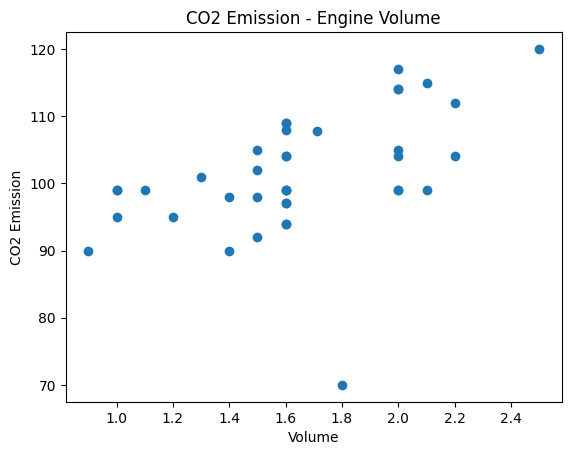

In [40]:
import matplotlib.pyplot as plt

plt.scatter(df["Volume"], df["CO2"])
plt.xlabel("Volume")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Volume")
plt.show()

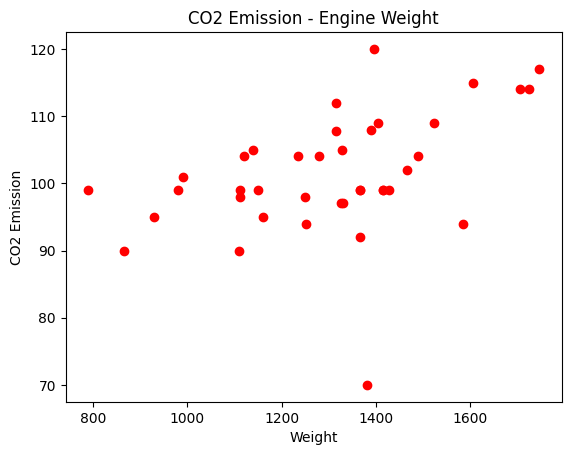

In [41]:
plt.scatter(df["Weight"], df["CO2"] , color = "red")
plt.xlabel("Weight")
plt.ylabel("CO2 Emission")
plt.title("CO2 Emission - Engine Weight")
plt.show()

#### Correlation Matrix

In [42]:
df[["Volume", "Weight", "CO2"]].corr()

,Volume,Weight,CO2
Volume,1.000000,0.715267,0.498192
Weight,0.715267,1.000000,0.439841
CO2,0.498192,0.439841,1.000000


### Clean, Modified Dataset

In [45]:
df.to_csv("../data/processed/co2_emission_modified.csv", index = False)

### Model Development

## Gradient Descent
**Optimization** forms the computational core of machine learning, framing model training as the search for parameters that **minimize a loss function**. Gradient descent is the foundational **iterative algorithm** that solves this problem. By calculating the gradient of the loss, it navigates the parameter space, taking steps proportional to the negative gradient to converge toward a **local minimum**. This simple yet powerful principle of following the path of **steepest descent** enables the learning process in models ranging from **simple linear regressions** to the most **complex deep neural networks**.

### Problem Statement and Formulation
In simple words, optimization means either **minimizing or maximizing** a function in the presence of **constriants**. The solution to the general minimization problem is given by the following equation.
$$ x^* = \underset{x \in R^n}{\arg\min} \, f(x) $$

Where:
- $ x = (x_0, x_1, …, x_n) $ is the **decision variable** vector.
- $ f $ is the **objective/cost function** (also called loss function in machine learning problems) that is supposed to be minimized/maximized.
- $ x^* $ is the **minimizing value**.

Gradient descent is an iterative gradient-based optimization algorithm in which the key mathematical technique is the **first-order Taylor approximation** which is the **first two terms of the Taylor series expansion**. The full Taylor series for $f(x)$ around point $x_0$ is as follows.

$$ f(x) = \sum \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n$$

The first two terms of this series are used for **linear approximation** of the function. This is called first-order Taylor approximation.

$$ f(x) \approx f(x_0) + f'(x_0)(x - x_0) $$

In order to minimize $f(x)$, the starting point $x_0$ is selected. Since the linear approximation is valid **locally**, the small step $\epsilon$ is taken from $x_0$. The goal is to find the best small step $\epsilon$ that decreases $f(x)$ as much as possible. Thus, the function is **expanded linearly** around $x_0$ as shown in the following equation.

$$ f(x_0 + \epsilon) \approx f(x_0) + f'(x_0)(x_0 + \epsilon - x_0) $$
$$ \Rightarrow f(x_0 + \epsilon) \approx f(x_0) + \epsilon f'(x_0) $$

This can be extended to **multi-dimensional space** using the **Gradient operator**.

$$ f(x + \varepsilon) \approx f(x) + \nabla f(x) \cdot \varepsilon $$

or in matrix notation 

$$ f(x + \varepsilon) \approx f(x) + \nabla f(x)^T \varepsilon $$

The dot product $\nabla f(x)^T \varepsilon = ||\nabla f(x)^T|| ||\varepsilon|| \cos(\theta)$ is most negative when $\varepsilon$ points in the **opposite direction** of the gradient. This means $\theta = (2k + 1)\pi$ and $\cos(\theta) = -1$. Thus, the **steepest descent** direction is as follows.

$$ \varepsilon = -\alpha \nabla f(x) $$

Where $\alpha > 0$ is called the **learning rate**.

Finally, in the context of machine learning/deep learning, gradient descent can be expressed in a more common notation as shown in the following.
$$ \Delta w = -\eta \nabla L(w) $$
$$ \Rightarrow w^{t + 1} = w^t - \eta \nabla L(w^t) $$
$$ w^0 = w^\text{ initial} $$

Where:
- $ w $ is the **weight vector (paramethers)**.
- $ \eta $ is the **learning rate**.
- $ L $ is the **loss function**.

The following table provides a summary of common loss functions and their applications in machine learning.
### Summary of Common Loss Functions
| Loss Function | Formula | Type | Use Cases | Key Properties |
| :-: | :-: | :-: | :-: | :-: |
| **L1 Loss (MAE)** | `∑\|y - ŷ\|` | Regression | Robust regression, outliers present | Robust to outliers, non-differentiable at 0 |
| **L2 Loss (MSE)** | `∑(y - ŷ)²` | Regression | Standard regression, smooth outputs | Sensitive to outliers, differentiable |
| **RMSE** | `√(∑(y - ŷ)²/n)` | Regression | Regression (interpretable units) | Same units as target, sensitive to outliers |
| **Binary Cross-Entropy** | `-[y·log(ŷ) + (1-y)·log(1-ŷ)]` | Classification | Binary classification | Probabilistic, penalizes wrong confidence |
| **Categorical Cross-Entropy** | `-∑ y·log(ŷ)` | Classification | Multi-class classification | Multi-class generalization, softmax output |

### Key Notes:
- $\hat{y}$ is the predicted output from the model
- $y$ is the true/actual/desired (target) value (the ground truth from dataset)
- $\text{MSE}$ = Mean Squared Error, $\text{MAE}$ = Mean Absolute Error
- $L1$ is the absolute derrivation.
- $L2$ is the euclidean norm.
- $L1/L2$ can refer to either loss functions or regularization terms
- **Cross-entropy** losses work with probability outputs (sigmoid/softmax)
- Choice depends on problem type, outlier sensitivity, and optimization needs

## References
[1] "User Guide, Scikit-Learn Documentation", https://scikit-learn.org/stable/user_guide.html, Accessed October 2025.

[2] Goodfellow, Ian., Bengio, Yoshua., Courville, Aaron., "Deep Learning", MIT Press, 2016.

[3] Grus, Joel., "Data Science from Scratch", O'Reilly, 2015.

[4] Geiger, Andreas. "Deep Learning", Lecture, University of Tübingen, https://uni-tuebingen.de/en/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/informatik/lehrstuehle/autonomous-vision/lectures/deep-learning/, Accessed November 2025.

[5] "Multiple Regression", W3schools, https://www.w3schools.com/python/python_ml_multiple_regression.asp, Accessed November 2025.

[6] "Machine Learning with Python Tutorial", Tutorialspoint, https://www.tutorialspoint.com/machine_learning_with_python/index.htm, Accessed October 2025.

[7] "Machine Learning (ML) Tutorial", Tutorialspoint, https://www.tutorialspoint.com/machine_learning/index.htm, Accessed October 2025.

[8] "Pandas Tutorial", W3schools, https://www.w3schools.com/python/pandas/default.asp, Accessed November 2025.